# 线性回归模型

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data, housing.target,random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [11]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train_scaled = transfer.fit_transform(x_train)
x_test_scaled = transfer.transform(x_test)
x_valid_scaled = transfer.transform(x_valid)

In [17]:
#tf.keras.models.Sequential()

model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])    

model.compile(loss='mean_squared_error',
             optimizer = 'adam'，
             )


In [13]:
model.layers#查看模型层数

In [14]:
model.summary()#d 模型参数

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [18]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = model.fit(x_train_scaled,y_train,
                    epochs=100,
                   validation_data=(x_valid_scaled,y_valid),
                   callbacks= callbacks 
                   )
#validation_data:训练过程中在验证集验证

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 229us/sample - loss: 2.0731 - val_loss: 0.8073
Epoch 2/100
11610/11610 [==============================] - 1s 126us/sample - loss: 0.6384 - val_loss: 0.5946
Epoch 3/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4997 - val_loss: 0.4863
Epoch 4/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4363 - val_loss: 0.4416
Epoch 5/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4071 - val_loss: 0.4117
Epoch 6/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3955 - val_loss: 0.3977
Epoch 7/100
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3883 - val_loss: 0.3957
Epoch 8/100
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3813 - val_loss: 0.3880
Epoch 9/100
11610/11610 [==============================] - 1s 116us/sample - lo

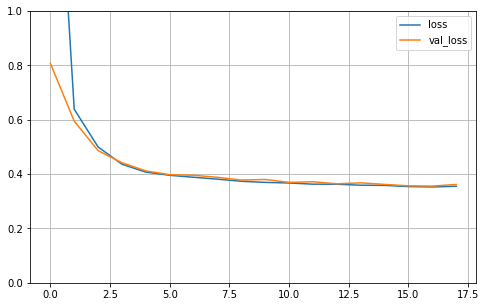

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [20]:
model.evaluate(x_test_scaled,y_test，verbose=2)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3729933723922848